In [67]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd

In [72]:
jobs_data = []

for i in range(1,8):
    url = f"https://id.jobstreet.com/id/Data-scientist-jobs?page={i}&sortmode=ListedDate"

    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.6668.90"
    }

    s = rq.session()
    s.headers.update(headers)

    try:
        page = s.get(url)
        soup = BeautifulSoup(page.text, "html.parser")
        joblist = soup.find('div', class_='gg45di0 _21bfxf1')

        for artikel in joblist.find_all('article', {'class': 'gg45di0 gg45di1 _1ubeeig8n _1ubeeig8o _1ubeeig7j _1ubeeig7k _1ubeeigav _1ubeeigaw _1ubeeig9r _1ubeeig9s _1ubeeigh _1ubeeig67 _1ubeeig5f efwo40b efwo409 efwo40a _1oxsqkd18 _1oxsqkd1b _1ubeeig33 _1ubeeig36'}):
            posisi = artikel.find('div', {'class' : 'gg45di0 _1ubeeig5h _1ubeeig53'})
            perusahaan = artikel.find(attrs={'data-automation':'jobCompany'})
            lokasi = artikel.find(attrs={'data-automation':'jobLocation'})
            gaji = artikel.find('span', {'class':'gg45di0 _1c7ocld2 _1ubeeig4z _1ubeeig0 _1ubeeigr _1c7ocld4'})
            waktu = artikel.find('span',{'class':'gg45di0 _1ubeeig4z _1oxsqkd0 _1oxsqkd1 _1oxsqkd22 _18ybopc4 _1oxsqkd7'})

            posisi_text = posisi.get_text() if posisi else "Posisi tidak ditemukan"
            perusahaan_text = perusahaan.get_text() if perusahaan else "Perusahaan tidak ditemukan"
            lokasi_text = lokasi.get_text() if lokasi else "Lokasi tidak ditemukan"
            gaji_text = gaji.get_text() if gaji else "Gaji tidak disebutkan"
            waktu_text = waktu.get_text() if waktu else "Waktu tidak ditemukan"

            jobs_data.append({
                "Posisi": posisi_text,
                "Perusahaan": perusahaan_text,
                "Lokasi": lokasi_text,
                "Gaji": gaji_text,
                "Waktu": waktu_text})
        
            print(posisi_text)
            print(perusahaan_text)
            print(lokasi_text)
            print(gaji_text)
            print(waktu_text)
            print("====================================")

    except rq.exceptions.RequestException as e:
        print(f"Error: {e}")

Data Engineer (Junior)
PT. SIGMA GLOBAL TEKNOLOGI (SIGMATECH)
Jakarta Raya
Gaji tidak disebutkan
9 jam yang lalu
Data Operations Engineer - L2
Proxima Consulting Indonesia
Jakarta Raya
Gaji tidak disebutkan
1 hari yang lalu
Data Operations Engineer - L1
Proxima Consulting Indonesia
Jakarta Raya
Gaji tidak disebutkan
1 hari yang lalu
Senior Data Scientist (Analytics)
Data Analytics
Jakarta Raya
Gaji tidak disebutkan
2 hari yang lalu
Junior AI Engineer
PINDAI
Tangerang Selatan
Rp 8.000.000 – Rp 12.000.000 per month
2 hari yang lalu
Senior Data Scientist (Analytics)
PT Solusi Transportasi Indonesia
Jakarta Raya
Gaji tidak disebutkan
2 hari yang lalu
DATA ANALYST
PT Unicom Harbura Jaya Makmur
Jakarta Pusat
Gaji tidak disebutkan
3 hari yang lalu
Data Engineer
PT Indocyber Global Teknologi
Kebayoran Lama
Gaji tidak disebutkan
3 hari yang lalu
Data Engineer
Floq
Kebayoran Lama
Gaji tidak disebutkan
3 hari yang lalu
Data AI Machine Learning
PT. Metrodata Electronics, Tbk
Jakarta Raya
Gaji tida

In [73]:
df = pd.DataFrame(jobs_data)

In [74]:
df.head()

,Posisi,Perusahaan,Lokasi,Gaji,Waktu
0,Data Engineer (Junior),PT. SIGMA GLOBAL TEKNOLOGI (SIGMATECH),Jakarta Raya,Gaji tidak disebutkan,9 jam yang lalu
1,Data Operations Engineer - L2,Proxima Consulting Indonesia,Jakarta Raya,Gaji tidak disebutkan,1 hari yang lalu
2,Data Operations Engineer - L1,Proxima Consulting Indonesia,Jakarta Raya,Gaji tidak disebutkan,1 hari yang lalu
3,Senior Data Scientist (Analytics),Data Analytics,Jakarta Raya,Gaji tidak disebutkan,2 hari yang lalu
4,Junior AI Engineer,PINDAI,Tangerang Selatan,Rp 8.000.000 – Rp 12.000.000 per month,2 hari yang lalu


In [82]:
df.to_csv("result_scraping.csv",index=False)

In [ ]:
import duckdb as ddb
con = ddb.connect("test_scraping")

In [81]:
con.sql(""" select * from df """)

┌──────────────────────────────────────────────────────────────────────┬────────────────────────────────────────┬───────────────────┬────────────────────────────────────────┬────────────────────┐
│                                Posisi                                │               Perusahaan               │      Lokasi       │                  Gaji                  │       Waktu        │
│                               varchar                                │                varchar                 │      varchar      │                varchar                 │      varchar       │
├──────────────────────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────┼────────────────────────────────────────┼────────────────────┤
│ Data Engineer (Junior)                                               │ PT. SIGMA GLOBAL TEKNOLOGI (SIGMATECH) │ Jakarta Raya      │ Gaji tidak disebutkan                  │ 9 jam yang lalu    │
│ Data Operations En

In [91]:
con.sql(""" SELECT Lokasi, COUNT(*) as Jumlah_Lowongan
FROM df
GROUP BY Lokasi
ORDER BY Jumlah_Lowongan DESC
LIMIT 10 """)

┌─────────────────────┬─────────────────┐
│       Lokasi        │ Jumlah_Lowongan │
│       varchar       │      int64      │
├─────────────────────┼─────────────────┤
│ Jakarta Raya        │              74 │
│ Jakarta Selatan     │              16 │
│ Kebayoran Lama      │              16 │
│ Indonesia           │               8 │
│ Jakarta Utara       │               7 │
│ Kecamatan Tangerang │               7 │
│ Bandung             │               6 │
│ Jakarta Pusat       │               6 │
│ Jakarta Barat       │               5 │
│ Pulo Gadung         │               3 │
├─────────────────────┴─────────────────┤
│ 10 rows                     2 columns │
└───────────────────────────────────────┘

In [92]:
con.sql(""" SELECT *
FROM df
WHERE Posisi LIKE '%Data Engineer%' """)

┌─────────────────────────────────────────────────────────────────────────┬────────────────────────────────────────┬─────────────────────┬───────────────────────┬────────────────────┐
│                                 Posisi                                  │               Perusahaan               │       Lokasi        │         Gaji          │       Waktu        │
│                                 varchar                                 │                varchar                 │       varchar       │        varchar        │      varchar       │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────────┼───────────────────────┼────────────────────┤
│ Data Engineer (Junior)                                                  │ PT. SIGMA GLOBAL TEKNOLOGI (SIGMATECH) │ Jakarta Raya        │ Gaji tidak disebutkan │ 9 jam yang lalu    │
│ Data Engineer                                                           │ PT I

In [95]:
con.sql(""" SELECT Posisi, Perusahaan, Lokasi, Gaji, Waktu
FROM df
WHERE Gaji != 'Gaji tidak disebutkan'
ORDER BY Gaji DESC """)

┌──────────────────────────────────────────┬────────────────────────────────────────────┬───────────────────┬─────────────────────────────────────────┬────────────────────┐
│                  Posisi                  │                 Perusahaan                 │      Lokasi       │                  Gaji                   │       Waktu        │
│                 varchar                  │                  varchar                   │      varchar      │                 varchar                 │      varchar       │
├──────────────────────────────────────────┼────────────────────────────────────────────┼───────────────────┼─────────────────────────────────────────┼────────────────────┤
│ Data Engineer                            │ PT Solusi Pembayaran Elektronik            │ Cipondoh          │ Rp 9.000.000 – Rp 13.000.000 per month  │ 10 hari yang lalu  │
│ Data Analyst                             │ PT Tempindo Jasatama (Divisi Jakarta Temp) │ Jakarta Selatan   │ Rp 8.000.000 – Rp 8.500.0

In [85]:
lokasi_counts = df['Lokasi'].value_counts()
print(lokasi_counts)


Lokasi
Jakarta Raya           74
Kebayoran Lama         16
Jakarta Selatan        16
Indonesia               8
Kecamatan Tangerang     7
Jakarta Utara           7
Bandung                 6
Jakarta Pusat           6
Jakarta Barat           5
Tangerang Selatan       3
Semarang                3
Bekasi                  3
Yogyakarta              3
Pulo Gadung             3
Jakarta Timur           3
Surabaya                3
Kalideres               2
DI Yogyakarta           2
Medan                   2
Makassar                2
Batam                   2
Malang                  2
Surakarta               2
Jawa Barat              2
Tangerang               2
Kemayoran               1
Karawang                1
Grogol Petamburan       1
Balikpapan              1
Purwakarta              1
Kelapa Gading           1
Cikarang                1
Cipondoh                1
Subang                  1
Badung                  1
Demak                   1
Karawaci                1
Kota Kediri             1
Bojon

In [88]:
perusahaan_counts = df['Perusahaan'].value_counts()
print(perusahaan_counts)


Perusahaan
Mindrift                                            19
PT. BFI FINANCE INDONESIA, Tbk                       6
PT Aplikasi Karya Anak Bangsa (GO-JEK Indonesia)     5
PT. Metrodata Electronics, Tbk                       4
EY                                                   4
                                                    ..
FIFGROUP                                             1
Company Confidential                                 1
PT Fugro Indonesia                                   1
Tokenmetrics                                         1
Mitra Integrasi Informatika                          1
Name: count, Length: 145, dtype: int64


In [87]:
waktu_counts = df['Waktu'].value_counts()
print(waktu_counts)


Waktu
30+ hari yang lalu    95
10 hari yang lalu     16
11 hari yang lalu     12
13 hari yang lalu      9
12 hari yang lalu      9
5 hari yang lalu       8
3 hari yang lalu       7
27 hari yang lalu      7
26 hari yang lalu      7
23 hari yang lalu      6
6 hari yang lalu       4
25 hari yang lalu      3
18 hari yang lalu      3
2 hari yang lalu       3
1 hari yang lalu       2
19 hari yang lalu      2
4 hari yang lalu       2
9 hari yang lalu       2
8 hari yang lalu       2
9 jam yang lalu        1
22 hari yang lalu      1
24 hari yang lalu      1
29 hari yang lalu      1
Name: count, dtype: int64


C:\Users\kurra\AppData\Local\Temp\ipykernel_33072\3418823198.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lokasi.values, y=top_lokasi.index, palette='Blues_d')


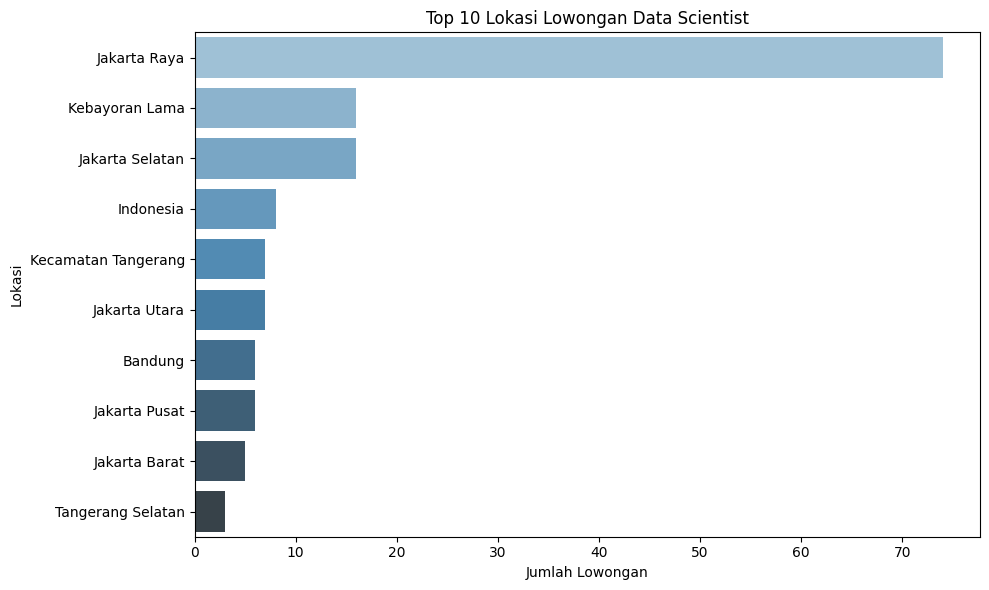

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 lokasi
top_lokasi = df['Lokasi'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_lokasi.values, y=top_lokasi.index, palette='Blues_d')
plt.title("Top 10 Lokasi Lowongan Data Scientist")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Lokasi")
plt.tight_layout()
plt.show()


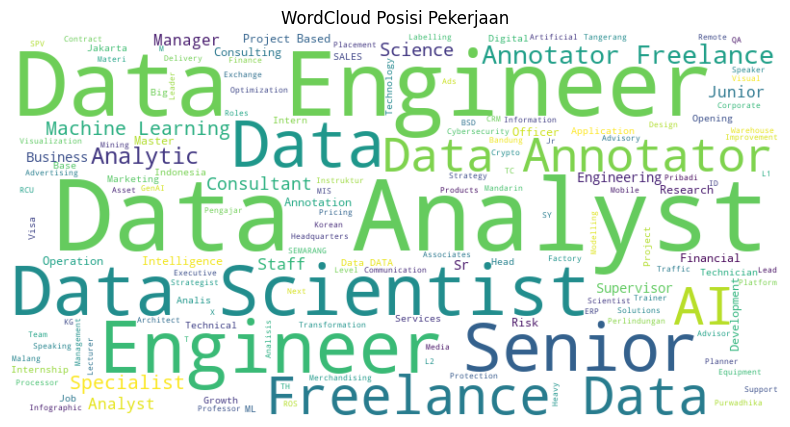

In [90]:
from wordcloud import WordCloud

text = " ".join(df['Posisi'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Posisi Pekerjaan")
plt.show()
